In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Aleksander Mikucki - sprawozdanie lab 5
# Zadanie 1
Generujemy losowe punkty, stosujemy prostą metodę symulowanego wyżarzania do zmniejszenia kosztu trasy

In [2]:
points = []
size = 50
defOrder = []
for i in range(size):
    points.append((random.random(),random.random()))
    defOrder.append(i)

In [3]:
def getDistanceForRoute(order):
    distance = 0
    lastPos = points[order[0]]
    for n in order[1:]:
        distance+=np.linalg.norm(np.array(points[n])-np.array(lastPos))
        lastPos = points[n]
    return distance

In [4]:
def mutateOrder(o):
    order = o.copy()
    idx = random.randint(0,len(order)-2)
    order[idx], order[idx+1] = order[idx+1], order[idx] #zamieniamy sąsiednie punkty
    return order

In [11]:
getDistanceForRoute(defOrder)

24.92738717576127

In [12]:
getDistanceForRoute(mutateOrder(defOrder))

24.54610902371623

In [18]:
temp = 1
minTemp = 0.000001

In [19]:
def shouldAccept(oldCost, newCost, temp):
    if(oldCost > newCost):  
        return True
    else:
        return np.exp((oldCost - newCost) / temp)

In [20]:
solution = defOrder
history = []
while(temp > minTemp):
    newSolution = mutateOrder(solution)
    newCost = getDistanceForRoute(newSolution)
    oldCost = getDistanceForRoute(solution)
    if(shouldAccept(oldCost, newCost, temp)):
        solution = newSolution
    temp = 0.999 * temp
    history.append(getDistanceForRoute(newSolution))

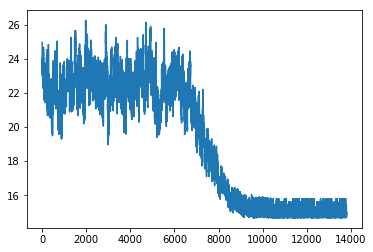

In [23]:
plt.plot(history);

Ciekawym jest fakt istnienia konkretnego przedziału, w którym następuje znacząca optymalizacja rozwiązania (być może została odkryta nowa konfiguracja, która pozwala na dalszą optymalizację).
Spodziewałem się, że postęp będzie bardziej liniowy, spowalniający wraz z liczbą iteracji.

# Zad 2
Symulacja pseudograwitacji, "pseudo" ponieważ nie uzależniamy energii kwadratu od odległości do pozostałych (bo byłaby to złożoność O(N^2) dla każdej iteracji), kodujemy za to na sztywno energię jako odległość od środka.

In [171]:
randArr = np.random.randint(10,size=(20, 20))

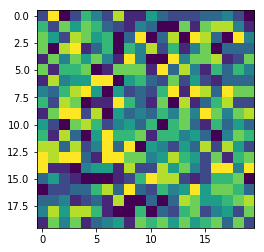

In [172]:
plt.imshow(randArr)

In [199]:
def getEnergyForArray(array):
    [h,w] = array.shape
    energy = 0
    for y in range(0,h):
        for x in range(0,w):
            energy+=(abs(y-h/2) + abs(x-w/2))*array[x][y]
    return energy

In [206]:
def mutateArray(a):
    array = a.copy()
    [h,w] = array.shape
    if(random.random()>0.5):
        idx = random.randint(0, w - 2)
        for idy in range(0, h):
            array[idx][idy],array[idx+1][idy] = array[idx+1][idy],array[idx][idy]
    else:
        idy = random.randint(0, h - 2)
        for idx in range(0, w):
            array[idx][idy],array[idx][idy+1] = array[idx][idy+1],array[idx][idy]
    return array

def mutateArray2(a):
    array = a.copy()
    [h,w] = array.shape
    if(random.random()>0.5):
        idx = random.randint(0, w - 1)
        idy = random.randint(0, h - 2)
        array[idx][idy],array[idx][idy+1] = array[idx][idy+1],array[idx][idy]
    else:
        idx = random.randint(0, w - 2)
        idy = random.randint(0, h - 1)
        array[idx][idy],array[idx+1][idy] = array[idx+1][idy],array[idx][idy]
    return array

Z dwóch funkcji przejścia do stanu sąsiedniego wybieramy tą zamieniającą ze sobą dwa kwadraty, nie całe rzędy/kolumny

In [207]:
temp = 1
minTemp = 0.00001
iteration = 1
solutions = {}
solutions[0] = randArr

In [208]:
solution = randArr
while(temp > minTemp):
    newSolution = mutateArray2(solution)
    newCost = getEnergyForArray(newSolution)
    oldCost = getEnergyForArray(solution)
    if(shouldAccept(oldCost, newCost, temp)):
        solution = newSolution
    if(iteration % 1000 == 0):
        solutions[iteration] = solution
    temp = 0.999 * temp
    iteration+=1

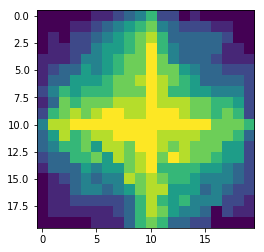

In [209]:
plt.imshow(solution)

In [7]:
# @interact(index=(0,iteration,1000))
# def show(index):
#    plt.imshow(solutions[index])

# Zad 3

In [507]:
sudoku = np.matrix([
    [0,0,0,2,6,0,7,0,1],
    [6,8,0,0,7,0,0,9,0],
    [1,9,0,0,0,4,5,0,0],
    [8,2,0,1,0,0,0,4,0],
    [0,0,4,6,0,2,9,0,0],
    [0,5,0,0,0,3,0,2,8],
    [0,0,9,3,0,0,0,7,4],
    [0,4,0,0,5,0,0,3,6],
    [7,0,3,0,1,8,0,0,0]
])

In [508]:
numbers = []
for x in range(0,9):
    for y in range(0,9):
        if(sudoku[x,y] > 0):
            numbers.append(sudoku[x,y])

In [509]:
expectednumbers = list(range(1,9+1)) * 9

In [510]:
for n in numbers:
    expectednumbers.remove(n)

In [511]:
overlay = np.zeros((9,9))
filledIndexes = []
for x in range(0,9):
    for y in range(0,9):
        if(sudoku[x,y] == 0):
            overlay[x,y] = expectednumbers.pop()
            filledIndexes.append((x,y))

In [512]:
filledIndexes[0:10]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 5),
 (0, 7),
 (1, 2),
 (1, 3),
 (1, 5),
 (1, 6),
 (1, 8)]

In [513]:
np.add(overlay,sudoku) # rozdzielamy sobie sudoku na druk i ołówek

matrix([[9., 8., 7., 2., 6., 6., 7., 5., 1.],
        [6., 8., 4., 3., 7., 2., 1., 9., 9.],
        [1., 9., 8., 7., 6., 4., 5., 5., 4.],
        [8., 2., 3., 1., 2., 1., 9., 4., 8.],
        [7., 6., 4., 6., 5., 2., 9., 4., 3.],
        [2., 5., 1., 9., 8., 3., 7., 2., 8.],
        [6., 5., 9., 3., 4., 3., 2., 7., 4.],
        [1., 4., 9., 8., 5., 7., 6., 3., 6.],
        [7., 5., 3., 3., 1., 8., 2., 1., 5.]])

In [514]:
def isListValid(row):
    validity = 0
    if(len(row) != 9):
        raise ValueError('The size should be 9.')
    items = {}
    for i in row:
        if(i not in items):
            validity+=1
        items[i] = True
    return 9 - validity 

funkcja kosztu jest dosyć ważna, liczymy ile powtarza się cyfr w danym rzędzie / kolumnie / minikwadracie

In [515]:
def getValidCount(overlay):
    count = 0
    count += sum(map(lambda r: isListValid(r),overlay.tolist()))
    count += sum(map(lambda r: isListValid(r),np.rot90(overlay).tolist()))
    for subblock_ax1 in np.split(overlay,3):
        for subblock_ax2 in np.split(subblock_ax1,3,axis=1):
            count += isListValid(subblock_ax2.flatten().tolist()[0])
    return(count) # logika sprawdzania sudoku w 6 liniach, python FTW

In [516]:
getValidCount(np.add(sudoku,overlay))

64

In [517]:
def mutateArrayOnlyNonZeros(a):
    array = np.copy(a)
    p1 = random.choice(filledIndexes) # szybka implementacja, brak szukania wolnych miejsc
    p2 = random.choice(filledIndexes)
    array[p1],array[p2] = array[p2],array[p1]
    return array #nie nadpisujemy ołówkiem druku

In [518]:
temp = 100
minTemp = 0 # minimalizujemy aż znajdziemy idealne rozwiazanie
iteration = 1

In [519]:
while(temp > minTemp):
    newOverlay = mutateArrayOnlyNonZeros(overlay)
    newCost = getValidCount(np.add(sudoku, newOverlay))
    oldCost = getValidCount(np.add(sudoku, overlay))
    if(iteration % 1000 == 0):
        print(newCost)
    if(shouldAccept(oldCost, newCost, temp)):
        overlay = newOverlay
    temp = 0.999 * temp
    if(newCost == 0):
        print('success')
        break
    iteration+=1

66
72
75
72
70
65
77
77
75
66
58
24
14
10
8
6
6
success


In [521]:
np.add(sudoku, newOverlay)

matrix([[4., 3., 5., 2., 6., 9., 7., 8., 1.],
        [6., 8., 2., 5., 7., 1., 4., 9., 3.],
        [1., 9., 7., 8., 3., 4., 5., 6., 2.],
        [8., 2., 6., 1., 9., 5., 3., 4., 7.],
        [3., 7., 4., 6., 8., 2., 9., 1., 5.],
        [9., 5., 1., 7., 4., 3., 6., 2., 8.],
        [5., 1., 9., 3., 2., 6., 8., 7., 4.],
        [2., 4., 8., 9., 5., 7., 1., 3., 6.],
        [7., 6., 3., 4., 1., 8., 2., 5., 9.]])

W sumie jestem zaskoczony że tak naiwna implementacja zadziałała, i to w ok. 30s, ale jest to dosyć prosty przykład sudoku :)